<a href="https://colab.research.google.com/github/syedaquib153/Transport-Demand-Prediction/blob/main/Transport_Demand_prediction_capstone_project_2_%2CAquib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Traffic Jam: Predicting People's Movement into Nairobi </u></b>

## <b> Problem Description </b>

### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.


### The towns from which these routes originate are:

### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

### The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark

### All of these points are mapped [here](https://www.google.com/maps/d/viewer?mid=1Ef2pFdP8keVHHid8bwju2raoRvjOGagN&ll=-0.8281897101491997%2C35.51706279999996&z=8).

### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.




## <b> Data Description </b>

### <b>Nairobi Transport Data.csv (zipped)</b> is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.


### Uber Movement traffic data can be accessed [here](https://movement.uber.com). Data is available for Nairobi through June 2018. Uber Movement provided historic hourly travel time between any two points in Nairobi. Any tables that are extracted from the Uber Movement platform can be used in your model.

### Variables description:

* #### ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* #### seat_number: seat assigned to ticket
* #### payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* #### payment_receipt: unique id number for ticket purchased from Mobiticket
* #### travel_date: date of ride departure. (MM/DD/YYYY)
* #### travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* #### travel_from: town from which ride originated
* #### travel_to: destination of ride. All rides are to Nairobi.
* #### car_type: vehicle type (shuttle or bus)
* #### max_capacity: number of seats on the vehicle

Importing Libraries

In [1]:
#Importing Libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

Mounting Drive

In [3]:
#Mounting Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Giving path to read the file

In [5]:
# Importing csv file using pandas .read_csv() function

In [6]:
df_1=pd.read_csv('/content/drive/MyDrive/excel/train_revised.csv')

df stands for DataFrame

In [7]:
# checking Head of the Dataframe using .head() function
df_1.head(10)

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-2017,07:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-2017,07:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-2017,07:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-2017,07:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-2017,07:12,Migori,Nairobi,Bus,49
5,5777,18B,Mpesa,B6PBDU30IZ,27-11-2017,07:10,Homa Bay,Nairobi,Bus,49
6,5777,14A,Mpesa,MZHGDGS6QZ,27-11-2017,07:10,Homa Bay,Nairobi,Bus,49
7,5778,25,Mpesa,MYVTYFNXDZ,27-11-2017,07:12,Migori,Nairobi,Bus,49
8,5778,21B,Mpesa,TE1WYK1NYE,27-11-2017,07:12,Migori,Nairobi,Bus,49
9,5781,22A,Mpesa,VGG7Q3MVJX,27-11-2017,07:09,Homa Bay,Nairobi,Bus,49


In [8]:
df_1.tail(5)

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-2018,08:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-2018,08:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-2018,08:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-2018,07:08,Awendo,Nairobi,Bus,49
51644,14304,7,Mpesa,AQN7FBUSGP,14-11-2017,05:10,Kisii,Nairobi,Bus,49


Data Pre-processing

In [9]:
# Checking rows and columns present in df_1

In [10]:
df_1.shape

(51645, 10)

Inference:There is 51645 rows and 10 columns in data

In [11]:
# Checking information of d1_1.info()

In [12]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


Inference: Information containing about dataframe such as columns,Nonnull,count and datatype

In [13]:
# Checking describtion of df_1 it gives count,mean,std,min etc
df_1.describe()

,ride_id,max_capacity
count,51645.000000,51645.000000
mean,10188.645793,34.534321
std,2211.295708,18.451193
min,1442.000000,11.000000
25%,8287.000000,11.000000
50%,10353.000000,49.000000
75%,12029.000000,49.000000
max,20117.000000,49.000000


Inference: Describtion of dataframe containing count,mean,standard deviation,Min value, Median and Max value

In [14]:
df_1.describe(include='object')

,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type
count,51645,51645,51645,51645,51645,51645,51645,51645
unique,61,2,51645,149,78,17,1,2
top,1,Mpesa,UZUEHCBUSO,10-12-2017,07:09,Kisii,Nairobi,Bus
freq,2065,51532,1,856,3926,22607,51645,31985


Inference:


*   There are 61 unique seat numbers.
*   There are 2 type of payment_method in which max mode of payment method was Mpesa.

*   The record of 149 days out of 2 years is present in dataset.
*   There are two different type of cars and most of them was Bus.





In [15]:
#Checking Null values
df_1.isnull().sum()

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

Inference: There is no null Values in dataframe

In [16]:
len(df_1['ride_id'].unique())

6249

Inference: There are total 6249 Unique ride_id

In [17]:
list(df_1.columns)

['ride_id',
 'seat_number',
 'payment_method',
 'payment_receipt',
 'travel_date',
 'travel_time',
 'travel_from',
 'travel_to',
 'car_type',
 'max_capacity']

Inference: Columns present inthe dataframe

***Data Visualization***

Getting Insights of the data from  graphs

In [18]:
#Getting Insights of Data by plotting countplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


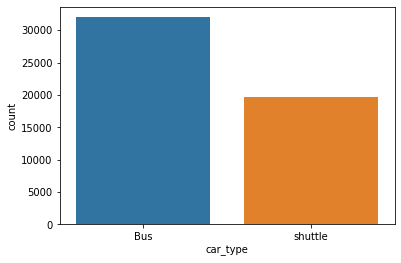

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


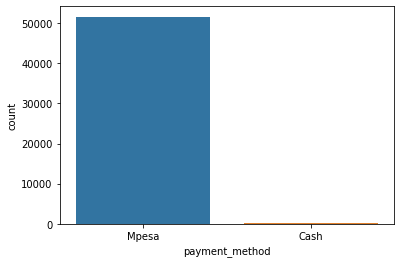

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


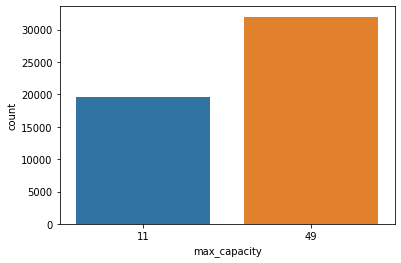

In [19]:
plots_count_columns=['car_type','payment_method','max_capacity']
for plots in plots_count_columns:
  sns.countplot(df_1[plots])
  plt.show()



Inference:


1.   There are two type of cars . The most used is Bus with Maximun capacity of 49.
2.   There are two modes of payments Mpesa and Cash. The most used is Mpesa.



In [20]:
#plotting Distplot and Boxplot graphs

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


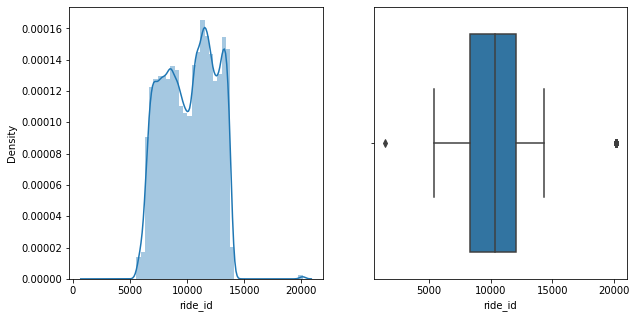

In [21]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(df_1['ride_id'], ax=axes[0])
sns.boxplot(df_1['ride_id'], ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


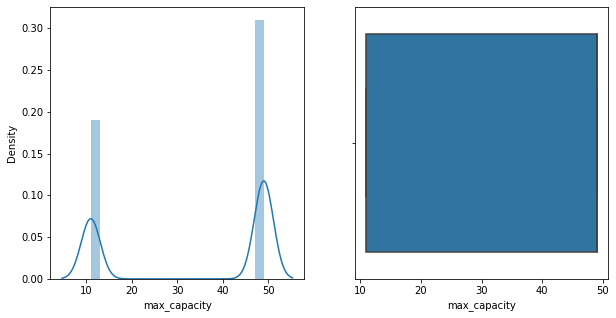

In [22]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(df_1['max_capacity'], ax=axes[0])
sns.boxplot(df_1['max_capacity'], ax=axes[1])

Inference: Maximum Capacity of Bus is 49

In [23]:
plt.rcParams["figure.figsize"] = [18, 5]


In [24]:
#Plotting countplot to count max values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


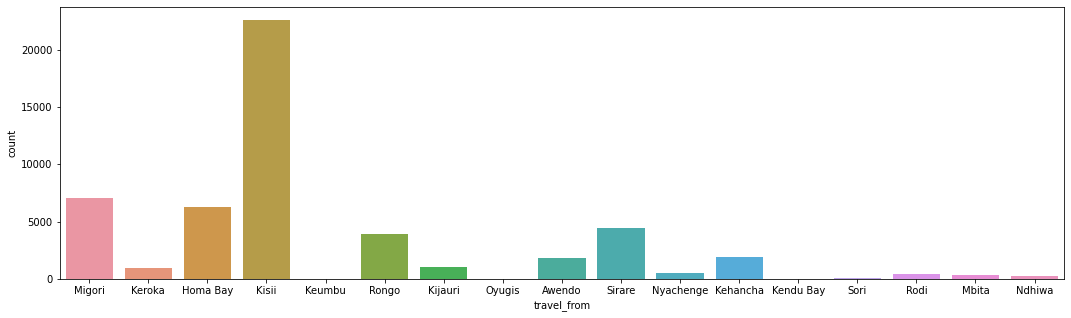

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


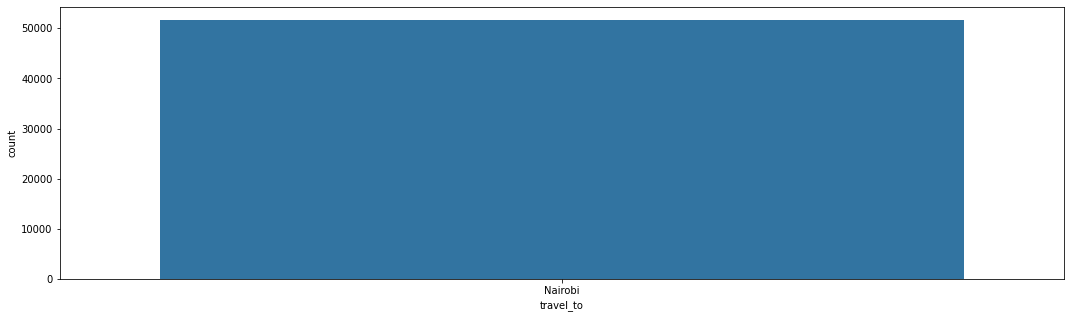

In [25]:
plots_bar_columns=['travel_from','travel_to']
for plots in plots_bar_columns:
  sns.countplot(df_1[plots])
  plt.show()

Inference: Maximum people travelling from Kissi to Nairobi

In [26]:
top_10_ride_id=df_1.ride_id.head(10)

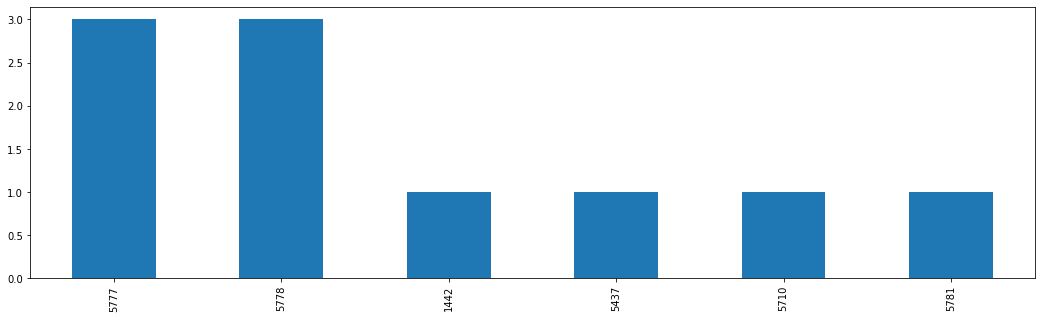

In [27]:
top_10_ride_id.value_counts().plot(kind='bar')

**Target Variable**

since we donot have the target Variable. We are creating the target variable by using 'ride_id' and 'seat_number' as ' Tickets' as Target Variable

In [28]:
# Grouping the ride_id and seat_numbers to get Targetvariable

In [29]:
target=df_1.groupby(['ride_id']).seat_number.count().rename('Tickets').reset_index()
df=target
df

,ride_id,Tickets
0,1442,1
1,5437,1
2,5710,1
3,5777,5
4,5778,31
...,...,...
6244,20113,9
6245,20114,4
6246,20115,5
6247,20116,1


Inference: Target Variable is 'Tickets'

In [30]:
df.shape

(6249, 2)

In [31]:
df=df.drop_duplicates('ride_id')

In [32]:
df.shape

(6249, 2)

Inference: All duplicates present in dataframe has been droppped

**Mergging Dataset**

In [33]:
#Mergging data using leftjoin

In [34]:
df=df_1.merge(target,how='left',on='ride_id')
df.head(5)

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,Tickets
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-2017,07:15,Migori,Nairobi,Bus,49,1
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-2017,07:12,Migori,Nairobi,Bus,49,1
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-2017,07:05,Keroka,Nairobi,Bus,49,1
3,5777,19A,Mpesa,SGP18CL0ME,27-11-2017,07:10,Homa Bay,Nairobi,Bus,49,5
4,5778,11A,Mpesa,BM97HFRGL9,27-11-2017,07:12,Migori,Nairobi,Bus,49,31


In [35]:
# Dropping the columns not required

In [36]:
df = df.drop(['seat_number','payment_method','payment_receipt'], axis=1)

In [37]:
df

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,Tickets
0,1442,17-10-2017,07:15,Migori,Nairobi,Bus,49,1
1,5437,19-11-2017,07:12,Migori,Nairobi,Bus,49,1
2,5710,26-11-2017,07:05,Keroka,Nairobi,Bus,49,1
3,5777,27-11-2017,07:10,Homa Bay,Nairobi,Bus,49,5
4,5778,27-11-2017,07:12,Migori,Nairobi,Bus,49,31
...,...,...,...,...,...,...,...,...
51640,13826,20-04-2018,08:00,Awendo,Nairobi,Bus,49,1
51641,13809,20-04-2018,08:00,Migori,Nairobi,Bus,49,29
51642,13809,20-04-2018,08:00,Migori,Nairobi,Bus,49,29
51643,13796,20-04-2018,07:08,Awendo,Nairobi,Bus,49,27


Now, let us drop some constant features

In [38]:
#Dropping constant features
import warnings
warnings.filterwarnings('ignore')

In [39]:
df.drop(['travel_to'],axis=1,inplace=True)

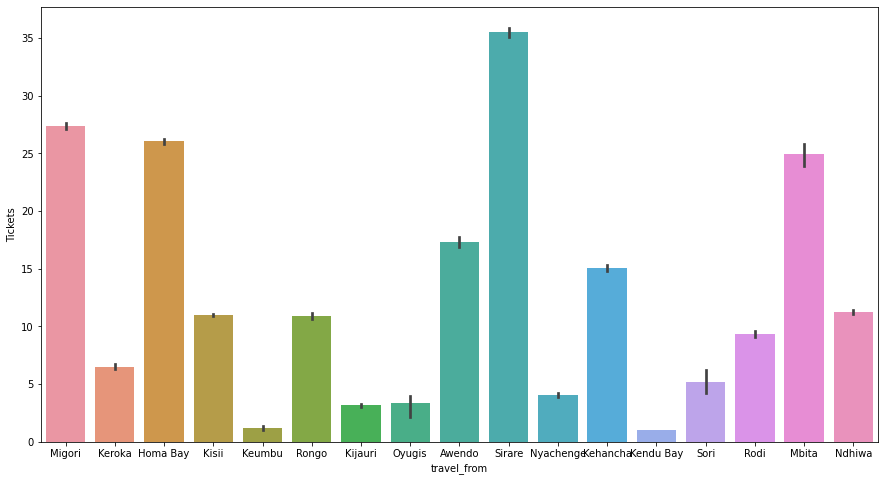

In [40]:
plt.figure(figsize=(15,8))
sp=sns.barplot(x='travel_from',y='Tickets',data=df)

Inference: Maxmimum tickets were from Sirare

**Feature Engineering**

In [41]:
#Concatinate travel date and travel time and make feature called date.
# To get more insights we have concatinated

In [42]:
df['date']=df['travel_date']+" "+df['travel_time']

In [43]:
df['date']

0        17-10-2017 07:15
1        19-11-2017 07:12
2        26-11-2017 07:05
3        27-11-2017 07:10
4        27-11-2017 07:12
               ...       
51640    20-04-2018 08:00
51641    20-04-2018 08:00
51642    20-04-2018 08:00
51643    20-04-2018 07:08
51644    14-11-2017 05:10
Name: date, Length: 51645, dtype: object

In [44]:
def  time_feature(data):

  ''' This function takes dataframe as an argument and extracts the different features
       from the data variable ofthe dataset and finally returns the updated dataset'''
  df['date']=pd.to_datetime(df['date'])
  df['day_of_week']=df['date'].dt.dayofweek
  df['day_of_year']=df['date'].dt.dayofyear
  df['day_of_month']=df['date'].dt.day
  df["year_woy"]=df["date"].dt.year.astype(str)+df["date"].dt.weekofyear.astype(str)
  df["hour"]=df["date"].dt.hour
  df["minute"]=df["date"].dt.minute
  df["is_weekend"]=df["day_of_week"].apply( lambda x : 1 if x  in [5,6] else 0 )
  df["year"]=df["date"].dt.year
  df["quarter"]=df["date"].dt.quarter
  df["month"]=df["date"].dt.month
  return data
  

In [45]:
df_new = time_feature(df)

In [46]:
# checking  new data frame df_new

In [47]:
df_new

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,Tickets,date,day_of_week,day_of_year,day_of_month,year_woy,hour,minute,is_weekend,year,quarter,month
0,1442,17-10-2017,07:15,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,17,201742,7,15,0,2017,4,10
1,5437,19-11-2017,07:12,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,19,201746,7,12,1,2017,4,11
2,5710,26-11-2017,07:05,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,26,201747,7,5,1,2017,4,11
3,5777,27-11-2017,07:10,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,27,201748,7,10,0,2017,4,11
4,5778,27-11-2017,07:12,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,27,201748,7,12,0,2017,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51640,13826,20-04-2018,08:00,Awendo,Bus,49,1,2018-04-20 08:00:00,4,110,20,201816,8,0,0,2018,2,4
51641,13809,20-04-2018,08:00,Migori,Bus,49,29,2018-04-20 08:00:00,4,110,20,201816,8,0,0,2018,2,4
51642,13809,20-04-2018,08:00,Migori,Bus,49,29,2018-04-20 08:00:00,4,110,20,201816,8,0,0,2018,2,4
51643,13796,20-04-2018,07:08,Awendo,Bus,49,27,2018-04-20 07:08:00,4,110,20,201816,7,8,0,2018,2,4


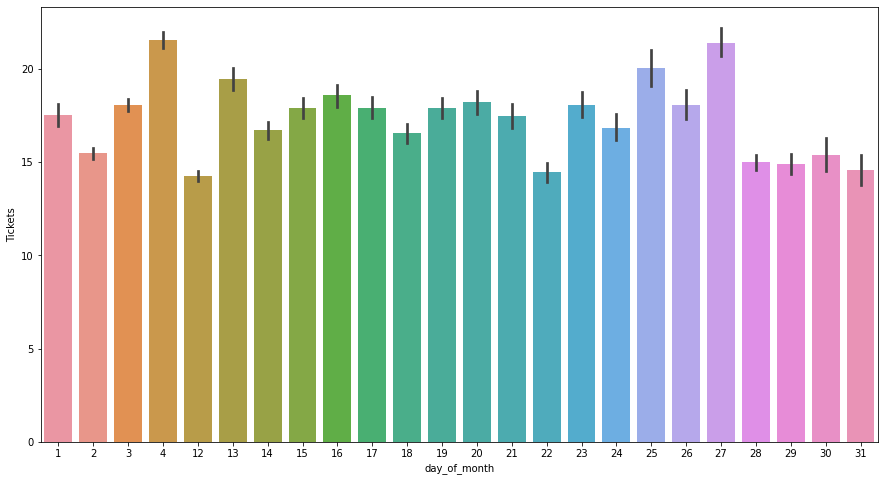

In [48]:
plt.figure(figsize=(15,8))
sns.barplot(x='day_of_month',y='Tickets',data=df_new)

Inference: we can see that there is a gap in between the days. we assume that there is a official holidays of public tranport b/w the days. we can see that there is not much difference between the tickets.

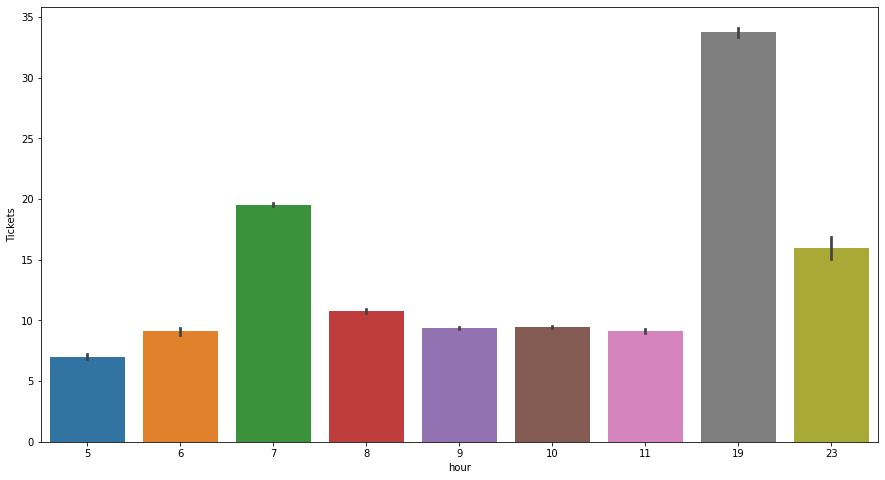

In [49]:
plt.figure(figsize=(15,8))
sns.barplot(x='hour',y='Tickets',data=df_new)

Inference: we can say that tickets sold in between 7am to 9pm.And it seems true because morning hours most of them goto the office.



In [50]:
# Replacing Categorical Values to Numerical Values

In [51]:
df_new['car_type'].replace(['Bus', 'shuttle'],
                        [0, 1], inplace=True)

In [52]:
df_new['travel_from'].unique()

array(['Migori', 'Keroka', 'Homa Bay', 'Kisii', 'Keumbu', 'Rongo',
       'Kijauri', 'Oyugis', 'Awendo', 'Sirare', 'Nyachenge', 'Kehancha',
       'Kendu Bay', 'Sori', 'Rodi', 'Mbita', 'Ndhiwa'], dtype=object)

In [53]:
# Replacing Categorical values to numerical values

In [54]:
df_new["travel_from"].replace(['Migori', 'Keroka', 'Homa Bay', 'Kisii', 'Keumbu', 'Rongo',
       'Kijauri', 'Oyugis', 'Awendo', 'Sirare', 'Nyachenge', 'Kehancha',
       'Kendu Bay', 'Sori', 'Rodi', 'Mbita', 'Ndhiwa'],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],inplace=True)

In [55]:
# create variables columns not required and dropping few columns

In [56]:
notreq = ["travel_date","travel_time","car_type","year_woy"]

In [57]:
df_new.drop(columns = "travel_date",inplace= True)

In [58]:
df_new.drop(columns = "travel_time",inplace= True)

In [59]:
df_new.drop(columns = "year_woy",inplace= True)

In [60]:
df_new.drop(columns = "date",axis=1,inplace= True)

In [61]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51645 entries, 0 to 51644
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ride_id       51645 non-null  int64
 1   travel_from   51645 non-null  int64
 2   car_type      51645 non-null  int64
 3   max_capacity  51645 non-null  int64
 4   Tickets       51645 non-null  int64
 5   day_of_week   51645 non-null  int64
 6   day_of_year   51645 non-null  int64
 7   day_of_month  51645 non-null  int64
 8   hour          51645 non-null  int64
 9   minute        51645 non-null  int64
 10  is_weekend    51645 non-null  int64
 11  year          51645 non-null  int64
 12  quarter       51645 non-null  int64
 13  month         51645 non-null  int64
dtypes: int64(14)
memory usage: 7.9 MB


In [62]:
# useing heatmap for findding correlation

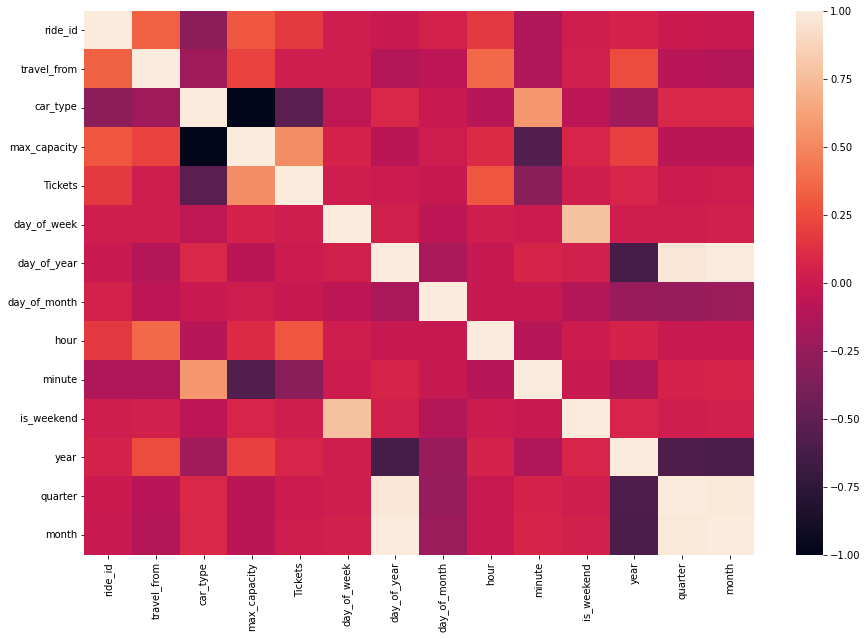

In [63]:
plt.figure(figsize=(15,10))
sns.heatmap(df_new.corr())

Inference:
we can see the correlation between the data columns


*   Positive Correlation from 0 to 1
*   Negative Correlation from 0 to -1